### Import Library

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler  
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import recall_score, precision_score, f1_score

### Read Dataset

In [9]:
# membaca dataset dan mengubahnya menjadi dataframe
data = pd.read_csv('dataset/heart_uci.csv')
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Data Processing

In [10]:
# menghapus data duplikat
data.drop_duplicates(inplace=True)

In [12]:
# normalisasi data
scaler = MinMaxScaler()
df = scaler.fit_transform(data)
df = pd.DataFrame(df, columns=data.columns)
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000,0.0
298,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000,0.0
299,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000,0.0
300,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000,0.0


### Split Dataset

In [15]:
# memisahkan fitur dan label
X = df.drop(['output'], axis=1).values
y = df.output.values

In [17]:
# membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=9)

### Calculating Euclidean Distance

In [18]:
# menghitung jarak data latih
jarak_train = euclidean_distances(X_train, X_train)
jarak_train = pd.DataFrame(jarak_train)

# menambahkan kolom label pada jarak data latih
y_train = pd.DataFrame({'output': y_train})
jarak_train = pd.concat([jarak_train, y_train], axis=1)

# menghitung jarak data latih dan data uji
jarak_test = euclidean_distances(X_train, X_test)
jarak_test = pd.DataFrame(jarak_test).values

### Defining Validity Calculation Function and k Values

In [19]:
# fungsi untuk menghitung validitas
def hitung_validitas(jarak_train,k):
  hasil_validitas = []
  for i in range(len(jarak_train)):
    index_label_terdekat = jarak_train[i].sort_values().head(k+1).index
    nilai_index_label_terdekat = index_label_terdekat.map(jarak_train['output'])
    label = nilai_index_label_terdekat[0]
    label_terdekat = nilai_index_label_terdekat[1:]
    validitas = sum(label_terdekat == label)/len(label_terdekat)
    hasil_validitas.append(validitas)
  return hasil_validitas

# membuat list nilai k
k_values = [1,3,5,7,9]

### Evaluating Performance Metrics

In [20]:
# membuat list untuk menampung nilai akurasi, recall, precision, dan f1 score
accuracy_scores = []
recall_scores = []
precision_scores = []
f1_scores = []

# Melakukan looping pada setiap nilai k
for k in k_values:
    validitas = hitung_validitas(jarak_train, k)
    hasil_bobot = []
    
    for i in range(len(jarak_test)):
        hitung_bobot = validitas[i] * (1 / (jarak_test[i] + 0.5))
        hasil_bobot.append(hitung_bobot)

    hasil_bobot = pd.DataFrame(hasil_bobot)

    df = pd.concat([hasil_bobot, y_train], axis=1)
    y_predict = []

    for i in range(len(y_test)):
        coba = df[[i, 'output']].sort_values(by=i, ascending=False).head(k)
        hasil = np.bincount(coba['output']).argmax()
        y_predict.append(hasil)

    hasil_prediksi = accuracy_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    precision = precision_score(y_test, y_predict)
    f1 = f1_score(y_test, y_predict)

    accuracy_scores.append(hasil_prediksi)
    recall_scores.append(recall)
    precision_scores.append(precision)
    f1_scores.append(f1)


### Visualizing Evaluation Metrics

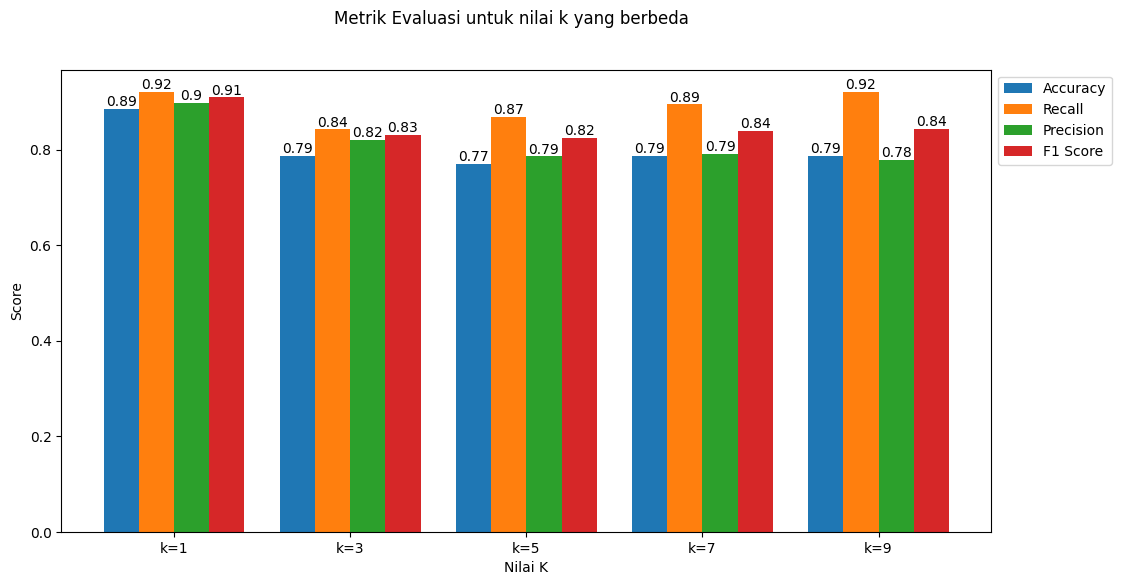

In [21]:
# Visualissi hasil evaluasi
metrics_names = ['Accuracy', 'Recall', 'Precision', 'F1 Score']
metrics_values = [accuracy_scores, recall_scores, precision_scores, f1_scores]

fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle('Metrik Evaluasi untuk nilai k yang berbeda')

width = 0.2
offsets = np.arange(len(k_values))

for i, (metric_name, metric_values) in enumerate(zip(metrics_names, metrics_values)):
    bars = ax.bar(offsets + width * i, metric_values, width=width, label=metric_name)
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

ax.set_xticks(offsets + width * (len(metrics_names) - 1) / 2)
ax.set_xticklabels([f'k={k}' for k in k_values])
ax.set_xlabel('Nilai K')
ax.set_ylabel('Score')

# Menambahkan legenda dan judul
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='', title_fontsize='12')

plt.show()